In [134]:
# імпортували необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')


In [135]:
# завантажуємо данні
df = pd.read_csv("C:/Users/user/AnacondaProj/mushrooms/mushrooms.csv")

In [136]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [137]:
df.shape

(8124, 23)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [139]:
class_frequencies = df['class'].value_counts()

labels = class_frequencies.index.tolist()
values = class_frequencies.tolist()
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=['Їстівні', 'Отруйні'], values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Розподіл грибів за класами', title_x=0.5, title_font=dict(size=28))
fig.show()

In [140]:
# чисельна статистика
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [141]:
# перевіряємо чи є втрачені значення
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [142]:
# унікальні значення кожного стовпця
for i in df.columns:
    print()
    print(i)
    print(set(df[i].tolist()))
    print()


class
{'p', 'e'}


cap-shape
{'s', 'k', 'x', 'c', 'f', 'b'}


cap-surface
{'s', 'g', 'f', 'y'}


cap-color
{'r', 'p', 'u', 'c', 'y', 'b', 'w', 'e', 'n', 'g'}


bruises
{'t', 'f'}


odor
{'s', 'a', 'p', 'm', 'c', 'l', 'f', 'n', 'y'}


gill-attachment
{'a', 'f'}


gill-spacing
{'c', 'w'}


gill-size
{'b', 'n'}


gill-color
{'r', 'k', 'p', 'u', 'o', 'y', 'b', 'w', 'h', 'e', 'n', 'g'}


stalk-shape
{'t', 'e'}


stalk-root
{'r', 'c', '?', 'b', 'e'}


stalk-surface-above-ring
{'s', 'k', 'f', 'y'}


stalk-surface-below-ring
{'s', 'k', 'f', 'y'}


stalk-color-above-ring
{'p', 'e', 'o', 'c', 'y', 'w', 'b', 'n', 'g'}


stalk-color-below-ring
{'p', 'e', 'o', 'c', 'y', 'w', 'b', 'n', 'g'}


veil-type
{'p'}


veil-color
{'o', 'y', 'n', 'w'}


ring-number
{'o', 't', 'n'}


ring-type
{'p', 'l', 'f', 'e', 'n'}


spore-print-color
{'r', 'k', 'u', 'o', 'w', 'h', 'b', 'n', 'y'}


population
{'s', 'a', 'c', 'v', 'n', 'y'}


habitat
{'p', 'm', 'l', 'u', 'w', 'd', 'g'}



In [149]:
#заповнення «?» у стовпці stalk-root зі значенням режиму
df['stalk-root'] = np.where(df['stalk-root']=='?',df['stalk-root'].mode(),df['stalk-root'])

In [150]:
df['stalk-root'].value_counts()


stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

In [151]:
# перевіряємо на наявність дублікатів

df.duplicated().sum()

0

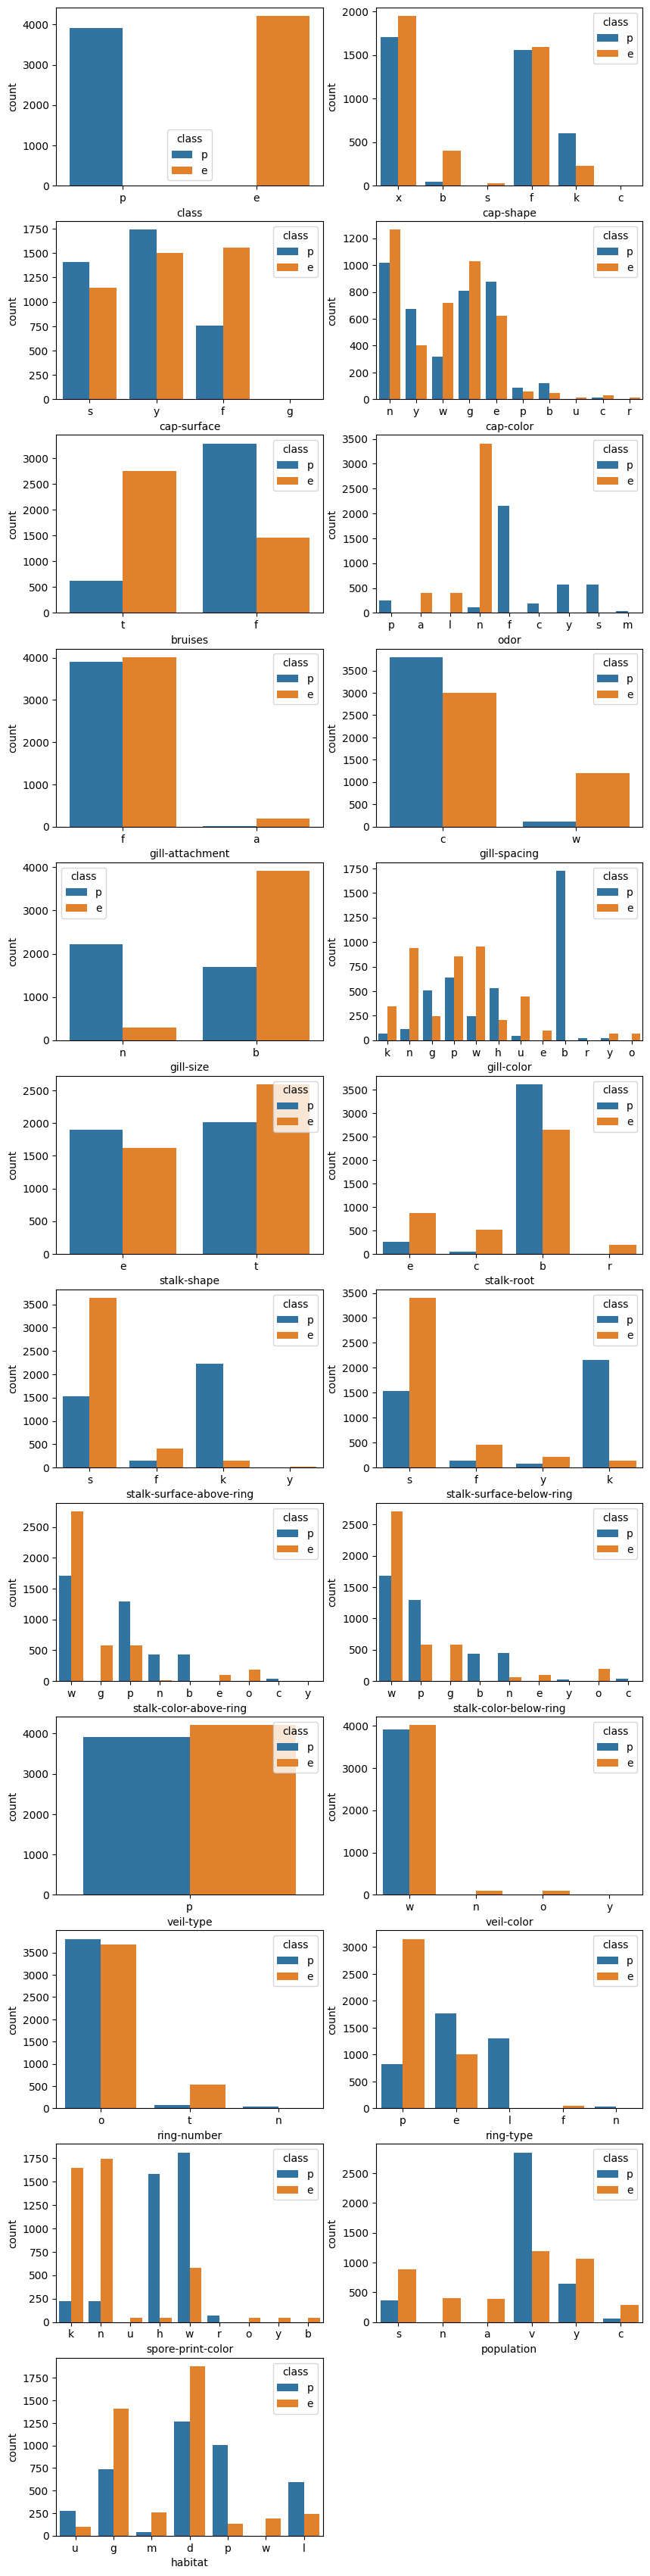

In [152]:
# Графік стовпців щодо класу грибів
plt.figure(figsize = (10,80))
plot_num = 1
for i in list(df.columns):
    plt.subplot(22,2,plot_num) 
    sns.countplot(x=df[i], hue = df['class'])
    plot_num+=1
plt.show()

In [153]:
col = ['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'veil-type']
for i in col:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [154]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,0,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,0,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,0,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,0,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,0,w,o,e,n,a,g


In [155]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-type'),
  Text(0, 17.5, 'veil-color'),
  Text(0, 18.5, 'ring-number'),
  Text(0, 19.5, 'ring-type'),
  Text(0, 20.5, 'spore-print-color'),
  Text(0, 21.5, 'population'),
  Text(0, 22.5, 'habitat')])

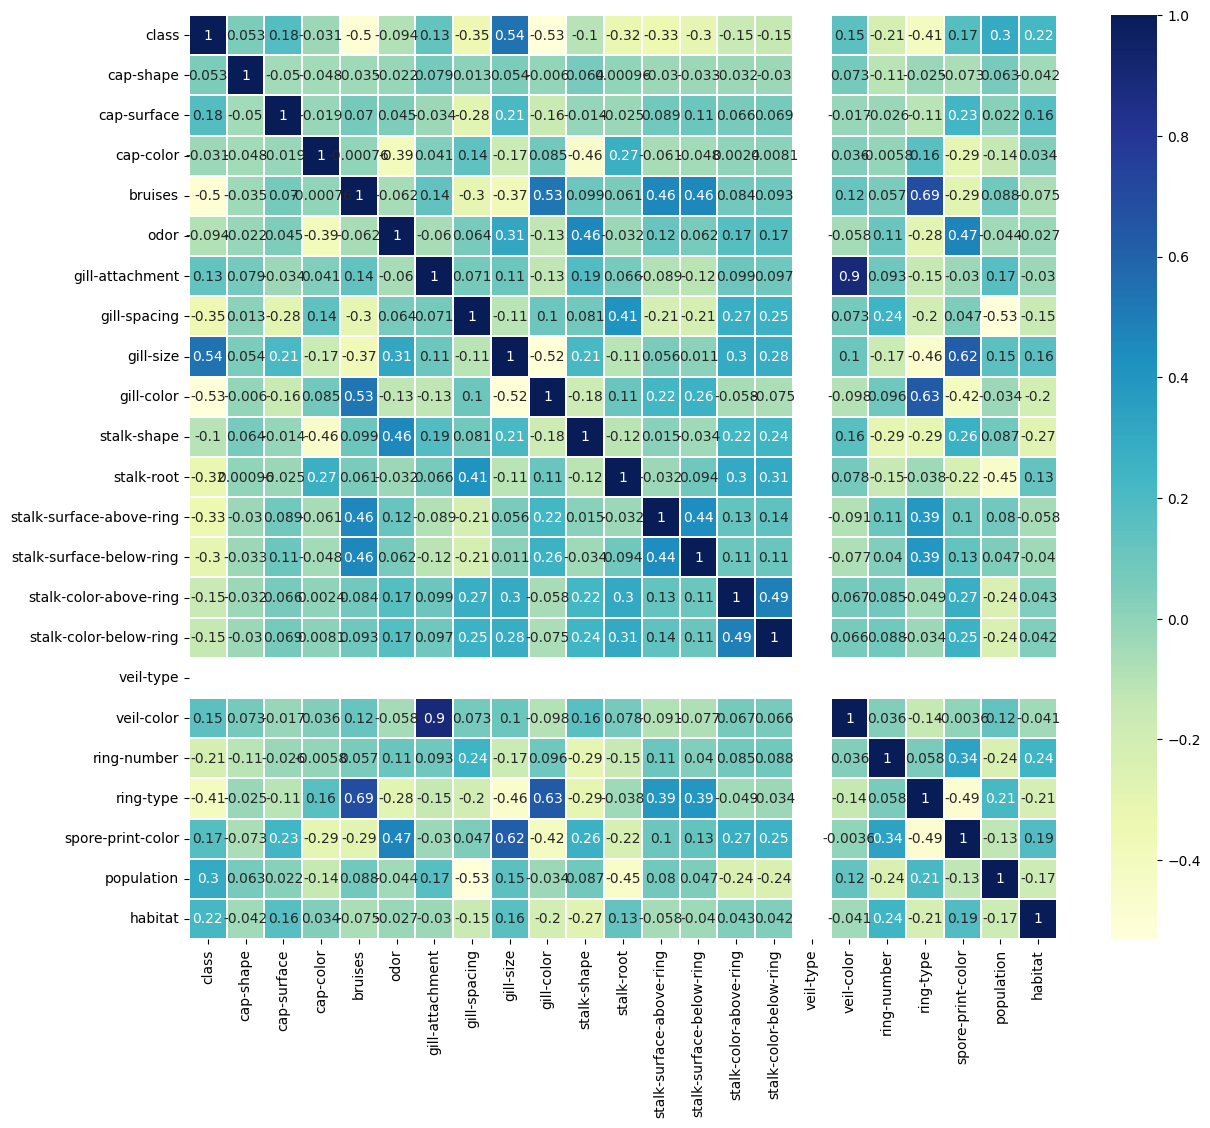

In [156]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int8  
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int8  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   int8  
 7   gill-spacing              8124 non-null   int8  
 8   gill-size                 8124 non-null   int8  
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   int8  
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [88]:
# Котегоріальні змінні
category_col = list(df.select_dtypes(include = ['object']).columns)
print(category_col)

['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [89]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,1,1,0,0,0,0,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0,1,1,0,0,0,0,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,1,1,0,1,0,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,0,1,1,0,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [90]:
# Відокремлюємо цільову зміну від її ознак
y = df['class']
x = df.drop('class',axis=1)

In [91]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [92]:
print('X_train shape: ', x_train.shape)
print('X_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (6499, 95)
X_test shape:  (1625, 95)
y_train shape:  (6499,)
y_test shape:  (1625,)


Logistic Regression


In [93]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [94]:
#Передбачення
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [95]:
# Оцінка точності моделі

print(confusion_matrix(y_train,train_pred_lr))

print(confusion_matrix(y_test,test_pred_lr))

[[3366    0]
 [   1 3132]]
[[842   0]
 [  3 780]]


In [96]:
print(classification_report(y_train,train_pred_lr))
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [97]:
# Списки для збереження точності
train_acc = [] 
test_acc = []

In [98]:
print(accuracy_score(y_train,train_pred_lr))
train_acc.append(accuracy_score(y_train,train_pred_lr))

print(accuracy_score(y_test,test_pred_lr))
test_acc.append(accuracy_score(y_test,test_pred_lr))

0.9998461301738729
0.9981538461538462


Decision Tree Classifier

In [99]:
dtree = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [100]:
#Передбачення
train_pred_dtree = dtree.predict(x_train)
test_pred_dtree = dtree.predict(x_test)

In [101]:
# Оцінка точності моделі
print(confusion_matrix(y_train,train_pred_dtree))

print(confusion_matrix(y_test,test_pred_dtree))

[[3366    0]
 [   0 3133]]
[[842   0]
 [  0 783]]


In [102]:
print(classification_report(y_train,train_pred_dtree))
print(classification_report(y_test,test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [103]:
print(accuracy_score(y_train,train_pred_dtree))
train_acc.append(accuracy_score(y_train,train_pred_dtree))

print(accuracy_score(y_test,test_pred_dtree))
test_acc.append(accuracy_score(y_test,test_pred_dtree))

1.0
1.0


Random Forest


In [104]:
rfr = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf= 1, min_samples_split= 2, random_state=200)
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=200)

In [105]:
train_pred_rfr = rfr.predict(x_train)
test_pred_rfr = rfr.predict(x_test)

In [106]:
print(confusion_matrix(y_train,train_pred_rfr))
print(confusion_matrix(y_test,test_pred_rfr))

[[3366    0]
 [   0 3133]]
[[842   0]
 [  0 783]]


In [107]:
print(classification_report(y_train,train_pred_rfr))
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [108]:
print(accuracy_score(y_train,train_pred_rfr))
train_acc.append(accuracy_score(y_train,train_pred_rfr))

print(accuracy_score(y_test,test_pred_rfr))
test_acc.append(accuracy_score(y_test,test_pred_rfr))

1.0
1.0


KNN

In [112]:
x_train = x_train.values
x_test = x_test.values

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [113]:
train_pred_knn = knn.predict(x_train)
test_pred_knn = knn.predict(x_test)

In [114]:
print(confusion_matrix(y_train,train_pred_knn))

print(confusion_matrix(y_test,test_pred_knn))

[[3366    0]
 [   0 3133]]
[[842   0]
 [  0 783]]


In [115]:
print(classification_report(y_train,train_pred_knn))
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [116]:
print(accuracy_score(y_train,train_pred_knn))
train_acc.append(accuracy_score(y_train,train_pred_knn))

print(accuracy_score(y_test,test_pred_knn))
test_acc.append(accuracy_score(y_test,test_pred_knn))

1.0
1.0


In [117]:
test_acc


[0.9981538461538462, 1.0, 1.0, 1.0]

In [118]:
train_acc

[0.9998461301738729, 1.0, 1.0, 1.0]

In [119]:
algorithm = ["LogisticRegression","DecisionTree","RandomForest","KNN"]

results=pd.DataFrame({'Model': algorithm,'Training Accuracy':train_acc,'Test Accuracy':test_acc})

display(results)


,Model,Training Accuracy,Test Accuracy
0,LogisticRegression,0.999846,0.998154
1,DecisionTree,1.000000,1.000000
2,RandomForest,1.000000,1.000000
3,KNN,1.000000,1.000000


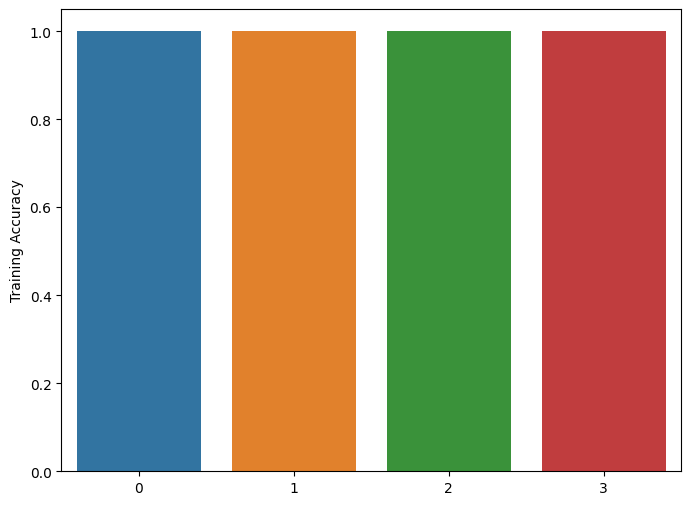

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(x=results.index, y=results['Training Accuracy'])
plt.show()

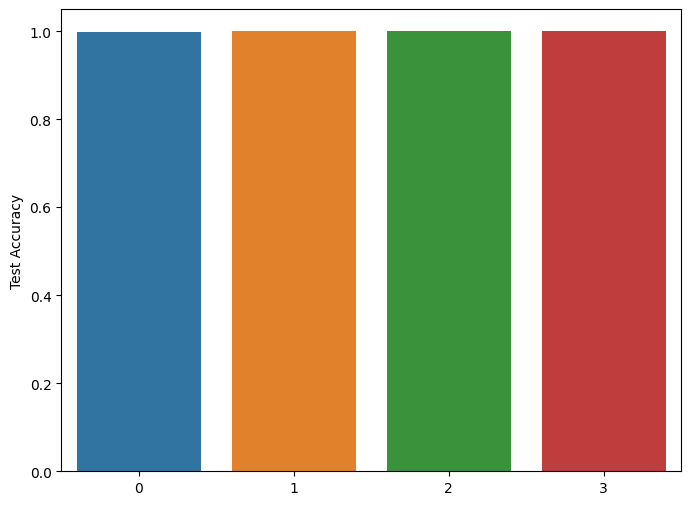

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(x=results.index, y=results['Test Accuracy'])
plt.show()

## Висновок

В цьому завданні я навчилась використовувати різні моделі для класифікації. Я обрала набір даних про  ядовиті і їстівні гриби. Обробила дані, видаливши будь-які відсутні значення та нормалізувавши дані. Я поділила вибірку на train та test в пропорції 80/20, для цього я використала метод sklearn train_test_split() та з random_state щоб наші предикти були постійно однакові для однакових даних.

Наступним кроком було тренування моделей, використовуючи об'єкт типу LogisticRegression, DecisionTree , RandomForest, KNN.

На останньому кроці я перевіряла моделі. Для цього я використовувала accuracy_score, confusion_matrix та classification_report. Після обчислення, я виявила, що наші дані найкраще передбачаються з LogisticRegression, DecisionTree. А Random Forest, KNN викликають проблему перенавчання.
